In [2]:
import pandas as pd

print("🔄 Loading datasets...")
ev_data = pd.read_csv("EVChargingStationUsage.csv", low_memory=False)
weather_data = pd.read_csv("weatherHistory.csv")
traffic_data = pd.read_csv("traffic.csv")
print("✅ Datasets loaded!")

# Check available columns in the EV data
print("🔍 EV data columns:")
print(ev_data.columns)

# Convert timestamps
print("🕒 Converting timestamps...")

# Parse EV timestamp
timestamp_column = 'Transaction Date (Pacific Time)'
if timestamp_column in ev_data.columns:
    ev_data['Timestamp'] = pd.to_datetime(ev_data[timestamp_column], errors='coerce')
else:
    raise KeyError(f"❌ Column '{timestamp_column}' not found in EV data.")

# Convert weather timestamp
weather_data['Timestamp'] = pd.to_datetime(weather_data['Formatted Date'], errors='coerce', utc=True)
if isinstance(weather_data['Timestamp'].dtype, pd.DatetimeTZDtype):
    weather_data['Timestamp'] = weather_data['Timestamp'].dt.tz_localize(None)

# Convert traffic timestamp
traffic_data['Timestamp'] = pd.to_datetime(traffic_data['DateTime'], errors='coerce')
traffic_data = traffic_data[traffic_data['Timestamp'].notnull()]
if isinstance(traffic_data['Timestamp'].dtype, pd.DatetimeTZDtype):
    traffic_data['Timestamp'] = traffic_data['Timestamp'].dt.tz_localize(None)

print("✅ Timestamp conversion done!")

# Merge datasets
print("🔗 Merging datasets...")
merged = ev_data.merge(weather_data, on="Timestamp", how="left")
merged = merged.merge(traffic_data, on="Timestamp", how="left")
print(f"✅ Merge complete! Final shape: {merged.shape}")

# Save merged data
merged.to_csv("merged.csv", index=False)
print("💾 File saved as merged.csv")

# Step 1: Sort by time for time-aware imputation
merged.sort_values('Timestamp', inplace=True)

# Check the columns in the merged dataset to identify weather-related columns
print("🔍 Merged data columns:")
print(merged.columns)

# Step 2: Define weather columns (adjust based on actual column names in the merged data)
weather_cols = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Visibility (km)']  # Modify this list based on the available columns

# Step 3: Forward fill weather columns
merged[weather_cols] = merged[weather_cols].ffill()

# Step 4: Fill any remaining NaNs with median values for weather columns
merged[weather_cols] = merged[weather_cols].fillna(merged[weather_cols].median())

# Preview
print("📊 Preview:")
print(merged.head())
print("✅ Done! 🚀")


🔄 Loading datasets...
✅ Datasets loaded!
🔍 EV data columns:
Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')
🕒 Converting timestamps...
✅ Timestamp conversion done!
🔗 Merging datasets...
✅ Merge complete! Final shape: (262690, 50)
💾 File saved as merged.csv
🔍 Merged data columns:
Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific 

In [6]:
# Round timestamps to the hour using lowercase 'h'
ev_data['Timestamp'] = ev_data['Timestamp'].dt.floor('h')
weather_data['Timestamp'] = weather_data['Timestamp'].dt.floor('h')
traffic_data['Timestamp'] = traffic_data['Timestamp'].dt.floor('h')

# Re-merge the datasets
merged = ev_data.merge(weather_data, on="Timestamp", how="left")
merged = merged.merge(traffic_data, on="Timestamp", how="left")

# Save and preview
merged.to_csv("merged.csv", index=False)
print("✅ Re-merged and saved with floored timestamps!")
print("📊 New preview:")
print(merged.head())

# Check null values again
print("\n🔍 Top nulls after fixing timestamps:")
print(merged.isnull().mean().sort_values(ascending=False).head(10))

print(f"Duplicates: {merged.duplicated().sum()}")

# Optional: drop rows where most of the weather data is missing
weather_cols = ['Precip Type', 'Wind Speed (km/h)', 'Humidity', 'Pressure (millibars)', 'Temperature (C)']
merged_cleaned = merged.dropna(subset=weather_cols, how='any')


✅ Re-merged and saved with floored timestamps!
📊 New preview:
                 Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

        Start Date Start Time Zone         End Date End Time Zone  \
0  7/29/2011 20:17             PDT  7/29/2011 23:20           PDT   
1   7/30/2011 0:00             PDT   7/30/2011 0:02           PDT   
2   7/30/2011 8:16             PDT  7/30/2011 12:34           PDT   
3  7/30/2011 14:51             PDT  7/30/2011 16:55           PDT   
4  7/30/2011 18:51             PDT  7/30/2011 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0                 7/2

In [7]:
import pandas as pd

# Load your datasets (assuming you've already done this)

# Convert the 'Timestamp' column in weather data to datetime and remove timezone
weather_data['Timestamp'] = pd.to_datetime(weather_data['Formatted Date'], errors='coerce', utc=True)

# Remove the timezone information (convert to naive datetime)
weather_data['Timestamp'] = weather_data['Timestamp'].dt.tz_localize(None)

# Convert the 'Timestamp' columns in EV and traffic data (if not already done)
ev_data['Timestamp'] = pd.to_datetime(ev_data['Transaction Date (Pacific Time)'], errors='coerce')
traffic_data['Timestamp'] = pd.to_datetime(traffic_data['DateTime'], errors='coerce')

# Now, proceed with merging
merged = ev_data.merge(weather_data, on="Timestamp", how="left")
merged = merged.merge(traffic_data, on="Timestamp", how="left")

# Continue with the rest of the preprocessing...


In [8]:
import pandas as pd
import holidays
import numpy as np

# Assuming you have already loaded merged dataset as `merged`

# Print column names to check if 'Cloud Cover' exists
print(merged.columns)

# 1. Handle Outliers (IQR method)
def remove_outliers(df, column):
    # If the column is a time column, convert it to numeric (seconds)
    if df[column].dtype == 'O':  # Check if the column is a string
        if 'Charging Time' in column:
            # Convert 'hh:mm:ss' to total seconds
            time = pd.to_timedelta(df[column])
            df[column] = time.dt.total_seconds()
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Convert 'Charging Time (hh:mm:ss)' to numeric seconds
merged = remove_outliers(merged, 'Charging Time (hh:mm:ss)')
merged = remove_outliers(merged, 'Wind Speed (km/h)')
merged = remove_outliers(merged, 'Temperature (C)')

# 2. Add Time Features
merged['Hour'] = merged['Timestamp'].dt.hour
merged['DayOfWeek'] = merged['Timestamp'].dt.dayofweek
merged['IsWeekend'] = merged['DayOfWeek'].isin([5, 6]).astype(int)
merged['Day'] = merged['Timestamp'].dt.day
merged['Month'] = merged['Timestamp'].dt.month

# 3. Add Holiday Feature
us_holidays = holidays.US()
merged['IsHoliday'] = merged['Timestamp'].dt.date.isin([x.date() for x in us_holidays]).astype(int)

# 4. Use Weather Features
weather_cols = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)', 'Visibility (km)']
if 'Cloud Cover' in merged.columns:
    merged['Cloud Cover'] = merged['Cloud Cover'].fillna(merged['Cloud Cover'].median())
else:
    print("'Cloud Cover' column is missing, skipping.")

if 'Precipitation' in merged.columns:
    merged['Precipitation'] = merged['Precipitation'].fillna(merged['Precipitation'].median())
else:
    print("'Precipitation' column is missing, skipping.")

# 5. Use Traffic Features
merged['Vehicles'] = merged['Vehicles'].fillna(merged['Vehicles'].median())
if 'Congestion' in merged.columns:
    merged['Congestion'] = merged['Congestion'].fillna('Low')
    merged['Congestion'] = merged['Congestion'].astype('category')

# Save the updated dataset
merged.to_csv("merged_with_features.csv", index=False)

# Preview the final dataset
print(merged.head())


Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number', 'Timestamp', 'Formatted Date', 'Summary',
       'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Loud Cover', 'Pressure (millibars)',
       'Daily Summary', 'DateTime', 'Junction', 'Vehicles', 'ID'],
      dtype='object')
'Cloud Cover' column is missing, skipping.
'Precipitation' column is missing, 

In [10]:
import pandas as pd

# 🔄 Load datasets
ev_data = pd.read_csv("EVChargingStationUsage.csv", low_memory=False)
weather_data = pd.read_csv("weatherHistory.csv")
traffic_data = pd.read_csv("traffic.csv")

# 🕒 Convert timestamps
ev_data['Timestamp'] = pd.to_datetime(ev_data['Transaction Date (Pacific Time)'], errors='coerce')
weather_data['Timestamp'] = pd.to_datetime(weather_data['Formatted Date'], errors='coerce', utc=True).dt.tz_localize(None)
traffic_data['Timestamp'] = pd.to_datetime(traffic_data['DateTime'], errors='coerce').dt.tz_localize(None)

# ⏱️ Round to nearest hour
ev_data['Timestamp'] = ev_data['Timestamp'].dt.floor('h')
weather_data['Timestamp'] = weather_data['Timestamp'].dt.floor('h')
traffic_data['Timestamp'] = traffic_data['Timestamp'].dt.floor('h')

# 🔗 Merge datasets
merged = ev_data.merge(weather_data, on="Timestamp", how="left")
merged = merged.merge(traffic_data, on="Timestamp", how="left")

# ✅ Confirm
print("Merged shape:", merged.shape)
print("Preview:")
print(merged[['Timestamp'] + [col for col in merged.columns if 'EV' in col or 'Usage' in col]][:5])


# Round timestamps to the hour using lowercase 'h'
ev_data['Timestamp'] = ev_data['Timestamp'].dt.floor('h')
weather_data['Timestamp'] = weather_data['Timestamp'].dt.floor('h')
traffic_data['Timestamp'] = traffic_data['Timestamp'].dt.floor('h')

# Re-merge the datasets
merged = ev_data.merge(weather_data, on="Timestamp", how="left")
merged = merged.merge(traffic_data, on="Timestamp", how="left")

Merged shape: (446267, 50)
Preview:
            Timestamp  EVSE ID
0 2011-07-29 23:00:00      NaN
1 2011-07-30 00:00:00      NaN
2 2011-07-30 12:00:00      NaN
3 2011-07-30 16:00:00      NaN
4 2011-07-30 20:00:00      NaN


EDA (EXPLORATARTY DATA ANALYSIS)

In [13]:
print(merged.columns.tolist())
merged['DateTime'] = pd.to_datetime(merged['Formatted Date'], errors='coerce', utc=True)
print(merged['DateTime'].head())
print(merged['DateTime'].dtype)
merged = merged.dropna(subset=['DateTime'])


['Station Name', 'MAC Address', 'Org Name', 'Start Date', 'Start Time Zone', 'End Date', 'End Time Zone', 'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)', 'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type', 'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code', 'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By', 'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County', 'System S/N', 'Model Number', 'Timestamp', 'Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary', 'DateTime', 'Junction', 'Vehicles', 'ID']
0   2011-07-29 23:00:00+00:00
1   2011-07-30 00:00:00+00:00
2   2011-07-30 12:00:00+00:00
3   2011-07-30 16:00:00+00:00
4   2011-07-30 20:00:00+00:00
Name: DateTime, dtype: datetime64[ns, UTC

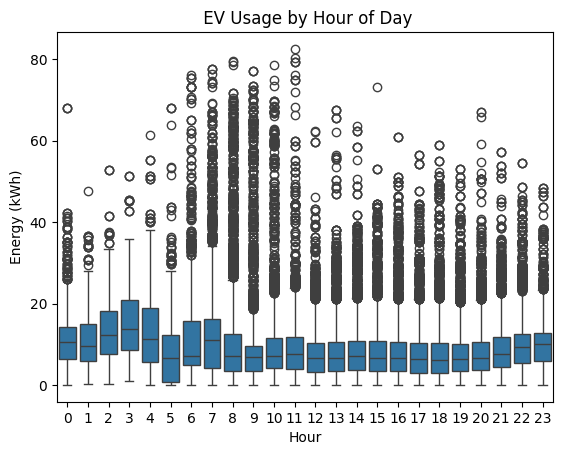

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Formatted Date' to datetime (force UTC to avoid timezone mix errors)
merged['DateTime'] = pd.to_datetime(merged['Formatted Date'], errors='coerce', utc=True)

# Drop rows where conversion failed (i.e., DateTime is NaT)
merged = merged.dropna(subset=['DateTime'])

# Extract time-based features
merged['Hour'] = merged['DateTime'].dt.hour
merged['DayOfWeek'] = merged['DateTime'].dt.day_name()

# Now it's safe to plot
sns.boxplot(data=merged, x='Hour', y='Energy (kWh)')
plt.title(" EV Usage by Hour of Day")
plt.show()


merged['Hour'] = merged['DateTime'].dt.hour
merged['DayOfWeek'] = merged['DateTime'].dt.day_name()


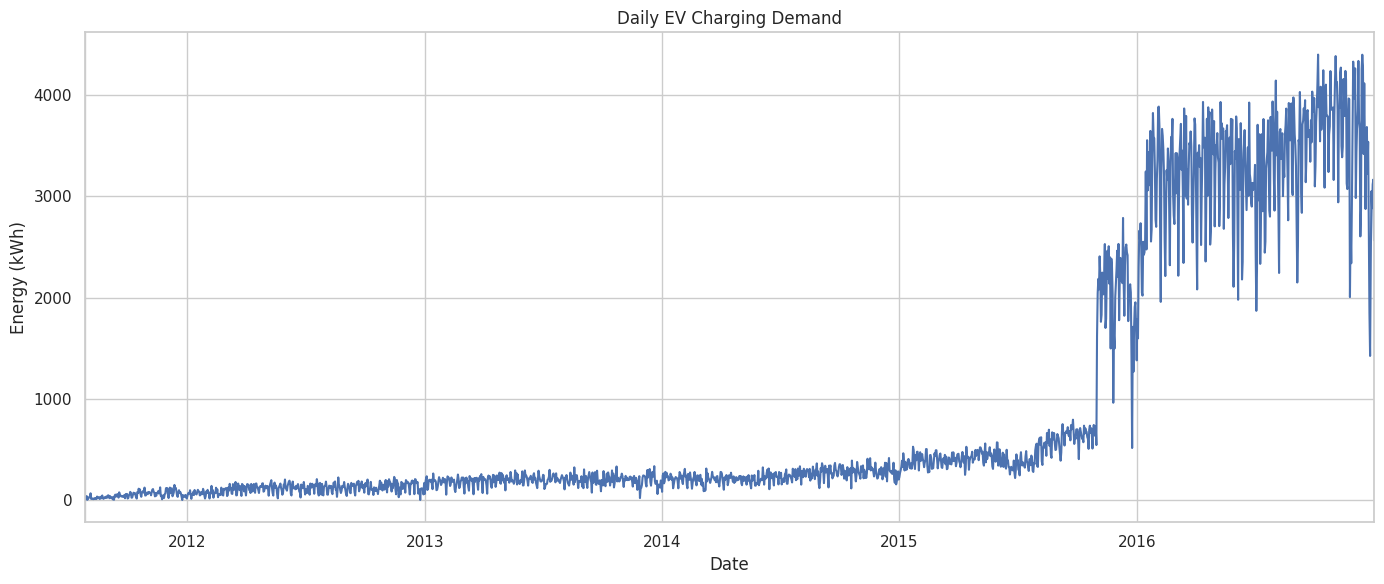

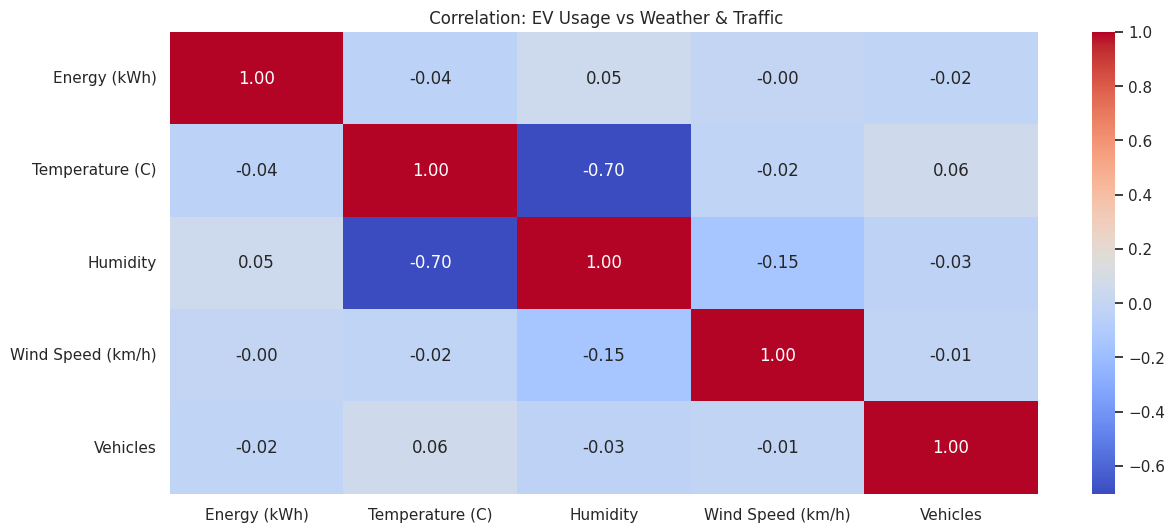

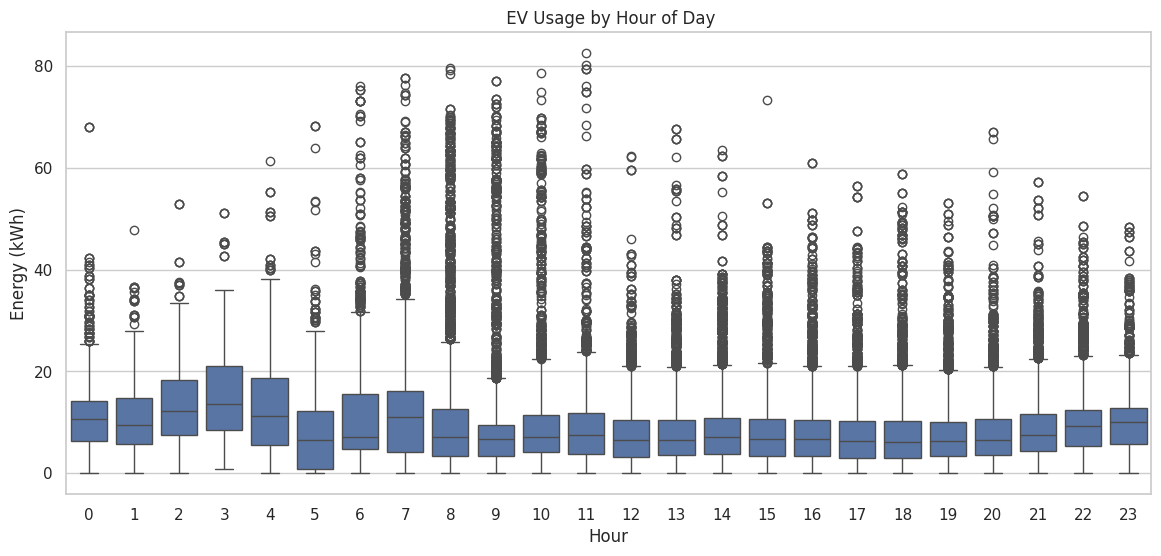

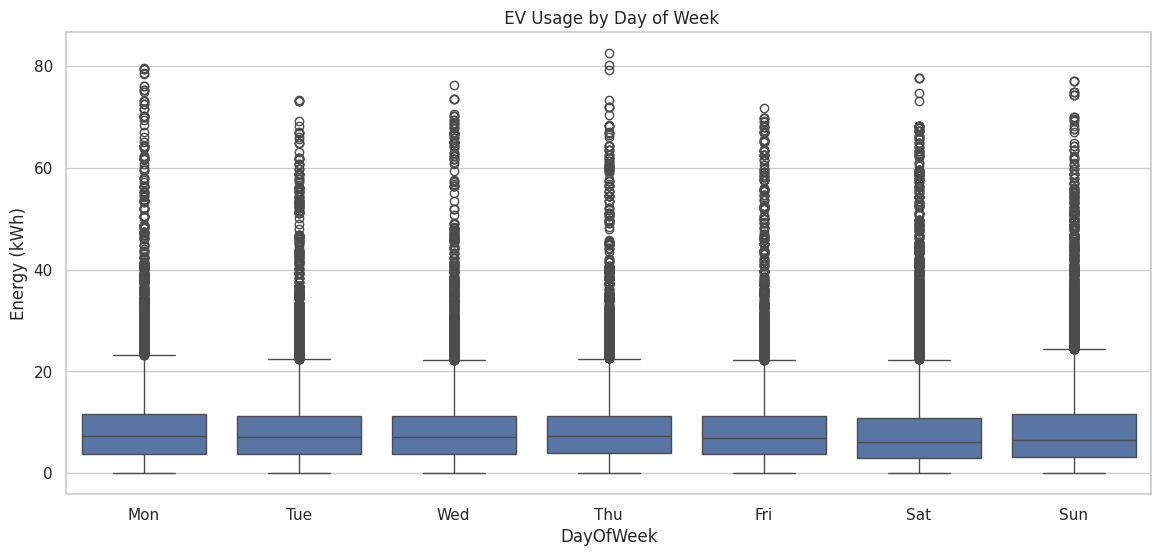

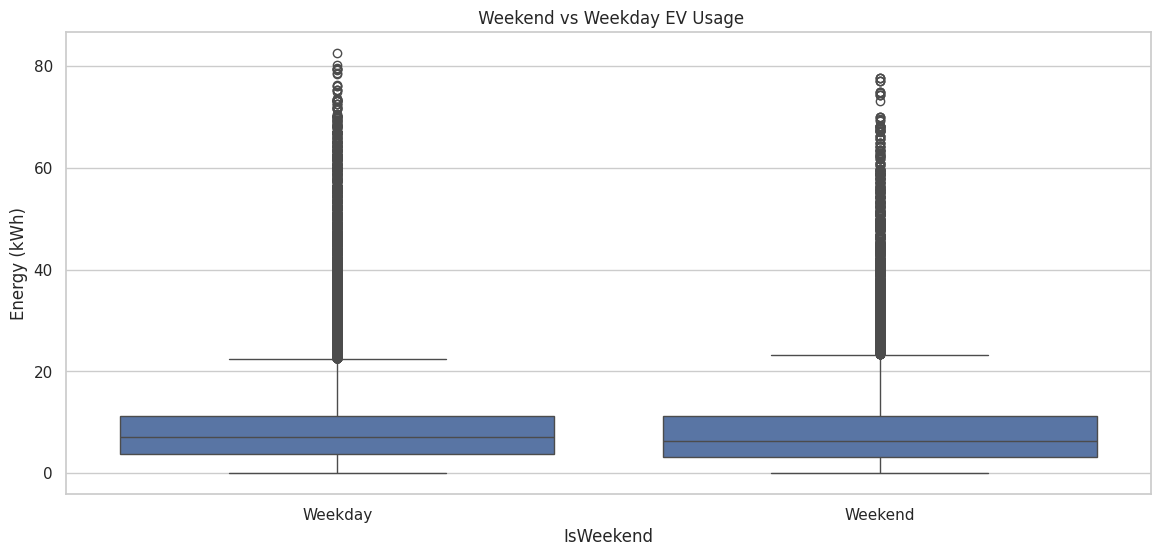

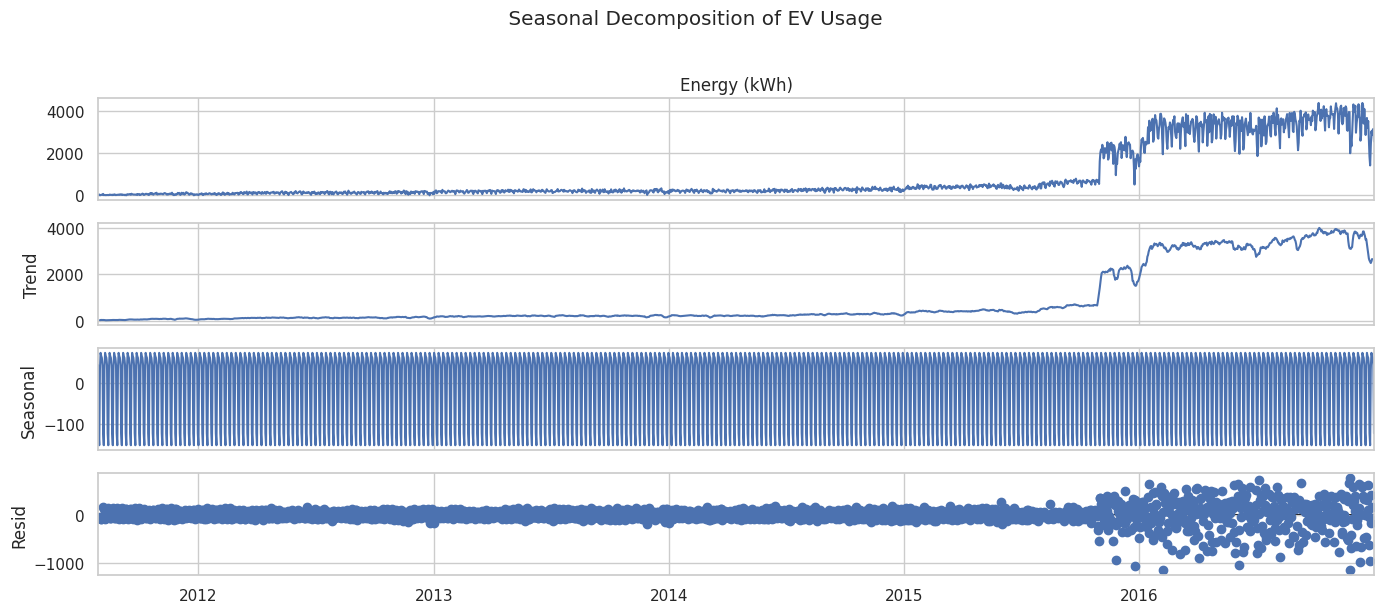

In [16]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot styling
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'

# --- Convert DateTime column ---
merged['DateTime'] = pd.to_datetime(merged['DateTime'], errors='coerce')

# --- Extract time features BEFORE setting as index ---
merged['Hour'] = merged['DateTime'].dt.hour
merged['DayOfWeek'] = merged['DateTime'].dt.dayofweek
merged['IsWeekend'] = merged['DayOfWeek'].isin([5, 6]).astype(int)

# --- Set datetime index ---
merged = merged.set_index('DateTime')

# --- Convert energy column to numeric ---
merged['Energy (kWh)'] = pd.to_numeric(merged['Energy (kWh)'], errors='coerce')

# --- 1. Time Series Plot ---
merged['Energy (kWh)'].resample('D').sum().plot()
plt.title("Daily EV Charging Demand")
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.tight_layout()
plt.show()

# --- 2. Correlation Heatmap ---
correlation_cols = ['Energy (kWh)', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Vehicles']
corr = merged[correlation_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Correlation: EV Usage vs Weather & Traffic")
plt.show()

# --- 3. Boxplots ---
# By Hour
sns.boxplot(data=merged.reset_index(), x='Hour', y='Energy (kWh)')
plt.title(" EV Usage by Hour of Day")
plt.show()

# By Day of Week
sns.boxplot(data=merged.reset_index(), x='DayOfWeek', y='Energy (kWh)')
plt.title(" EV Usage by Day of Week")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# By Weekend/Weekday
sns.boxplot(data=merged.reset_index(), x='IsWeekend', y='Energy (kWh)')
plt.title(" Weekend vs Weekday EV Usage")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

# --- 4. Seasonal Decomposition ---
daily_data = merged['Energy (kWh)'].resample('D').sum()
result = seasonal_decompose(daily_data, model='additive', period=7)
result.plot()
plt.suptitle(" Seasonal Decomposition of EV Usage", y=1.02)
plt.tight_layout()
plt.show()


TIME SERIES FORCASTING MODELS

In [20]:
from statsmodels.tsa.stattools import adfuller

# Resample daily data (already done in EDA, just repeating to be safe)
daily_data = merged['Energy (kWh)'].resample('D').sum()

# Drop missing values
daily_data = daily_data.dropna()

# Perform ADF Test
adf_result = adfuller(daily_data)

print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")


# First-order differencing
daily_diff = daily_data.diff().dropna()

# ADF test on differenced data
adf_diff_result = adfuller(daily_diff)

print("\nDifferenced ADF Test Statistic:", adf_diff_result[0])
print("p-value:", adf_diff_result[1])
for key, value in adf_diff_result[4].items():
    print(f"Critical Value ({key}): {value}")

# If you already have 'merged' loaded from earlier
merged['DateTime'] = pd.to_datetime(merged['Formatted Date'], errors='coerce', utc=True)
merged = merged.dropna(subset=['DateTime'])
merged = merged.set_index('DateTime')
merged['Energy (kWh)'] = pd.to_numeric(merged['Energy (kWh)'], errors='coerce')

# Create daily resampled time series
daily_data = merged['Energy (kWh)'].resample('D').sum()


ADF Test Statistic: 0.09770038359833685
p-value: 0.9659037374451097
Critical Value (1%): -3.4336975984464764
Critical Value (5%): -2.8630187704944223
Critical Value (10%): -2.567557237266907

Differenced ADF Test Statistic: -13.51766395883973
p-value: 2.774037040029544e-25
Critical Value (1%): -3.4336993130292686
Critical Value (5%): -2.8630195274705996
Critical Value (10%): -2.5675576403215574


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18501.813, Time=2.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18831.081, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18691.682, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18614.563, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18829.422, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18585.995, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18569.705, Time=1.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18479.101, Time=1.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=18549.208, Time=1.03 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=18480.723, Time=2.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18482.284, Time=1.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18480.749, Time=1.83 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=18541.215, Time=1.66 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=18479.363, Time=2.25 sec
 ARIMA(3,1,2)(0,0,0

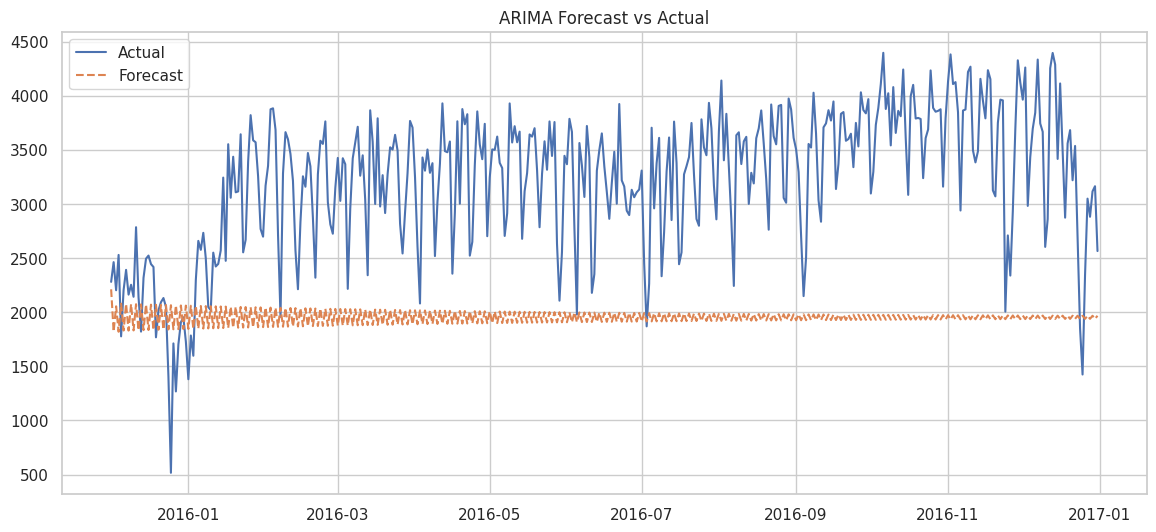

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split data into train/test (e.g., 80% train, 20% test)
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# Fit ARIMA model
model = auto_arima(train, seasonal=False, stepwise=True, trace=True)

# Forecast
forecast = model.predict(n_periods=len(test))

# Evaluation
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

print("MAE:", mae)
print("RMSE:", rmse)

# Plot actual vs forecast
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [22]:
import pandas as pd

# Load with low_memory=False to avoid dtype warnings
df = pd.read_csv("EVChargingStationUsage.csv", low_memory=False)

# Display column names to identify date-related columns
print(df.columns)

# If needed, parse an existing date/time column into datetime
# Example: Convert 'Transaction Date (Pacific Time)' to datetime (it’s already a full timestamp)
df['Transaction Date (Pacific Time)'] = pd.to_datetime(df['Transaction Date (Pacific Time)'], errors='coerce')

# If you want to work with Start and End Dates as datetime (even if there's no explicit time info):
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

# OPTIONAL: Show first few rows
print(df[['Transaction Date (Pacific Time)', 'Start Date', 'End Date']].head())


Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')
  Transaction Date (Pacific Time)          Start Date            End Date
0             2011-07-29 23:20:00 2011-07-29 20:17:00 2011-07-29 23:20:00
1             2011-07-30 00:02:00 2011-07-30 00:00:00 2011-07-30 00:02:00
2             2011-07-30 12:34:00 2011-07-30 08:16:00 2011-07-30 12:34:00
3             2011-07-30 16:55:00 2011-07-30 14:51:00 2011-07-30 16:55:00
4             2

ADF Statistic: 2.385, p-value: 0.999
Series is non-stationary. Differencing once...
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=18501.999, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18829.422, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=18690.284, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=18613.772, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=18585.071, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=18569.649, Time=0.30 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=18479.019, Time=0.85 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=18548.917, Time=0.38 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=18480.665, Time=1.35 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=18482.143, Time=0.96 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=18480.659, Time=0.92 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=18541.028, Time=0.85 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=18479.375, Time=1.23 sec
 A

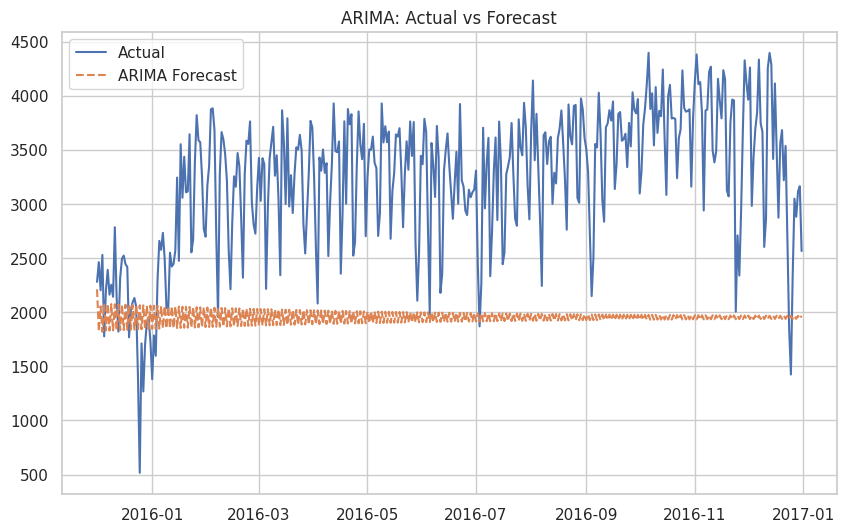

00:13:08 - cmdstanpy - INFO - Chain [1] start processing
00:13:11 - cmdstanpy - INFO - Chain [1] done processing


Prophet MAE:  1670.8952347967447
Prophet RMSE: 1752.298996630243
Prophet MAPE: 0.5090067422791669


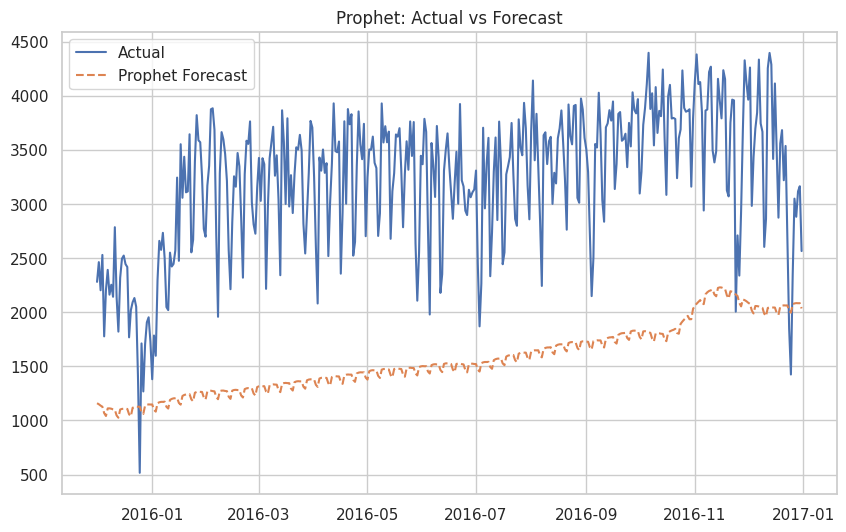

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

# ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

# Prophet
from prophet import Prophet

# ————— Load your data —————
# Replace this with your actual loading step if needed
# Example: daily_data = pd.read_csv("your_file.csv", parse_dates=["date_column"], index_col="date_column")["value_column"]
# Ensure daily_data is a Series indexed by datetime
# daily_data = ...

# ————— Prepare train/test split —————
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# ————— 1. Stationarity Test (ADF) —————
adf_result = adfuller(train)
print(f"ADF Statistic: {adf_result[0]:.3f}, p-value: {adf_result[1]:.3f}")
if adf_result[1] > 0.05:
    print("Series is non-stationary. Differencing once...")
    train_diff = train.diff().dropna()
else:
    train_diff = train

# ————— 2. ARIMA Modeling —————
arima_model = auto_arima(
    train_diff,
    seasonal=False,
    stepwise=True,
    trace=True,
    suppress_warnings=True
)

# If we differenced, forecast on differenced scale then invert
if adf_result[1] > 0.05:
    arima_forecast_diff = arima_model.predict(n_periods=len(test))
    forecast = pd.Series(
        arima_forecast_diff,
        index=test.index
    ).cumsum() + train.iloc[-1]
else:
    forecast = pd.Series(
        arima_model.predict(n_periods=len(test)),
        index=test.index
    )

# ————— 3. ARIMA Evaluation —————
arima_mae  = mean_absolute_error(test, forecast)
arima_rmse = np.sqrt(mean_squared_error(test, forecast))
arima_mape = mean_absolute_percentage_error(test, forecast)

print("ARIMA MAE: ", arima_mae)
print("ARIMA RMSE:", arima_rmse)
print("ARIMA MAPE:", arima_mape)

# Plot ARIMA
plt.figure(figsize=(10,6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, '--', label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA: Actual vs Forecast")
plt.show()

# ————— 4. Prophet Modeling —————
# Prepare DataFrame for Prophet
df = daily_data.reset_index()
df.columns = ['ds', 'y']

# Remove timezone if present
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

train_df = df.iloc[:train_size]
test_df  = df.iloc[train_size:]

m = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
m.fit(train_df)

future = m.make_future_dataframe(periods=len(test_df), freq='D')
forecast_df = m.predict(future)

# Extract Prophet prediction for test set
prophet_pred = forecast_df.set_index('ds')['yhat'].loc[test_df['ds']]

# ————— 5. Prophet Evaluation —————
prophet_mae  = mean_absolute_error(test_df['y'], prophet_pred)
prophet_rmse = np.sqrt(mean_squared_error(test_df['y'], prophet_pred))
prophet_mape = mean_absolute_percentage_error(test_df['y'], prophet_pred)

print("Prophet MAE: ", prophet_mae)
print("Prophet RMSE:", prophet_rmse)
print("Prophet MAPE:", prophet_mape)

# Plot Prophet
plt.figure(figsize=(10,6))
plt.plot(test_df['ds'], test_df['y'], label='Actual')
plt.plot(test_df['ds'], prophet_pred, '--', label='Prophet Forecast')
plt.legend()
plt.title("Prophet: Actual vs Forecast")
plt.show()




In [24]:
from prophet import Prophet
import pandas as pd

# Prepare DataFrame
df = daily_data.reset_index()
df.columns = ['ds', 'y']

# Remove timezone if exists
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

# Train/test split
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df  = df.iloc[train_size:]

# Prophet Model
m = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
m.fit(train_df)

# Forecast
future = m.make_future_dataframe(periods=len(test_df), freq='D')
forecast_df = m.predict(future)

# Extract only future forecasted points (test period)
prophet_forecast = forecast_df[['ds', 'yhat']].iloc[-len(test_df):]

# Save to CSV
prophet_forecast.to_csv("prophet_forecast_ready_for_tableau.csv", index=False)

print("✅ Prophet forecast exported successfully!")


00:13:16 - cmdstanpy - INFO - Chain [1] start processing
00:13:16 - cmdstanpy - INFO - Chain [1] done processing


✅ Prophet forecast exported successfully!


In [1]:
import pandas as pd

# Load your data
prophet_df = pd.read_csv("prophet_forecast_ready_for_tableau(in).csv")
arima_df = pd.read_csv("arima_forecast_ready_for_tableau.csv")
location_df = pd.read_csv("station_location_mapping.csv")

# Assign station name if it's for one location
station_name = "PALO ALTO CA / HAMILTON #1"
prophet_df["Station Name"] = station_name
arima_df["Station Name"] = station_name

# Merge with location data
prophet_merged = pd.merge(prophet_df, location_df, on="Station Name", how="left")
arima_merged = pd.merge(arima_df, location_df, on="Station Name", how="left")

# Save to new files
prophet_merged.to_csv("prophet_with_geo.csv", index=False)
arima_merged.to_csv("arima_with_geo.csv", index=False)
